In [3]:
!pip install chart_studio

   ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.4 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.4 kB ? eta -:--:--
   ------------------- -------------------- 30.7/64.4 kB 186.2 kB/s eta 0:00:01
   ------------------- -------------------- 30.7/64.4 kB 186.2 kB/s eta 0:00:01
   -------------------------------------- - 61.4/64.4 kB 251.0 kB/s eta 0:00:01
   -------------------------------------- - 61.4/64.4 kB 251.0 kB/s eta 0:00:01
   -------------------------------------- - 61.4/64.4 kB 251.0 kB/s eta 0:00:01
   -------------------------------------- - 61.4/64.4 kB 251.0 kB/s eta 0:00:01
   ---------------------------------------- 64.4/64.4 kB 144.5 kB/s eta 0:00:00


In [5]:
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/81.7 kB 131.3 kB/s eta 0:00:01
     --------- ---------------------------- 20.5/81.7 kB 131.3 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 178.6 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 245.8 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 207.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=e8b033077293256236cff0a2ce822f5be84146029cdb99086d62ae767e98cae8
  Stored in directory: c:\users\dsm\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b7

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [141]:
df=pd.read_excel("Data_Train.xlsx")

In [142]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [145]:
df1 = df.copy()

In [16]:
!pip install pandas-profiling

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [151]:
df1.shape

(10683, 11)

In [153]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [155]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [159]:
#Remove the NaN values from the dataset
df1.dropna(how='any',inplace=True)
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [161]:
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [165]:
import warnings
warnings.filterwarnings('ignore')
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
df1['Day_of_Journey']=(df1['Date_of_Journey']).dt.day
df1['Month_of_Journey']=(df1['Date_of_Journey']).dt.month

In [167]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey'],
      dtype='object')

In [169]:
df1.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       10673, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681, 10682],
      dtype='int64', length=10682)

In [171]:
#we can now drop the Date_of_journey
df1.drop(["Date_of_Journey"],axis=1,inplace=True)

In [173]:
#covert to datetime
df1['Dep_hr']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

In [175]:
#we can now drop the 'Dep_Time'

df1.drop(["Dep_Time"],axis=1,inplace=True)

In [177]:
df1['Arrival_hr']=pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arrival_min']=pd.to_datetime(df1['Arrival_Time']).dt.minute

In [179]:
#we can now drop the 'Arrival_Time'

df1.drop(["Arrival_Time"],axis=1,inplace=True)

In [181]:
duration=df1['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df1['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df1['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [183]:
#we can now drop the 'Duration'

df1.drop(["Duration"],axis=1,inplace=True)

In [69]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [185]:
df1['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

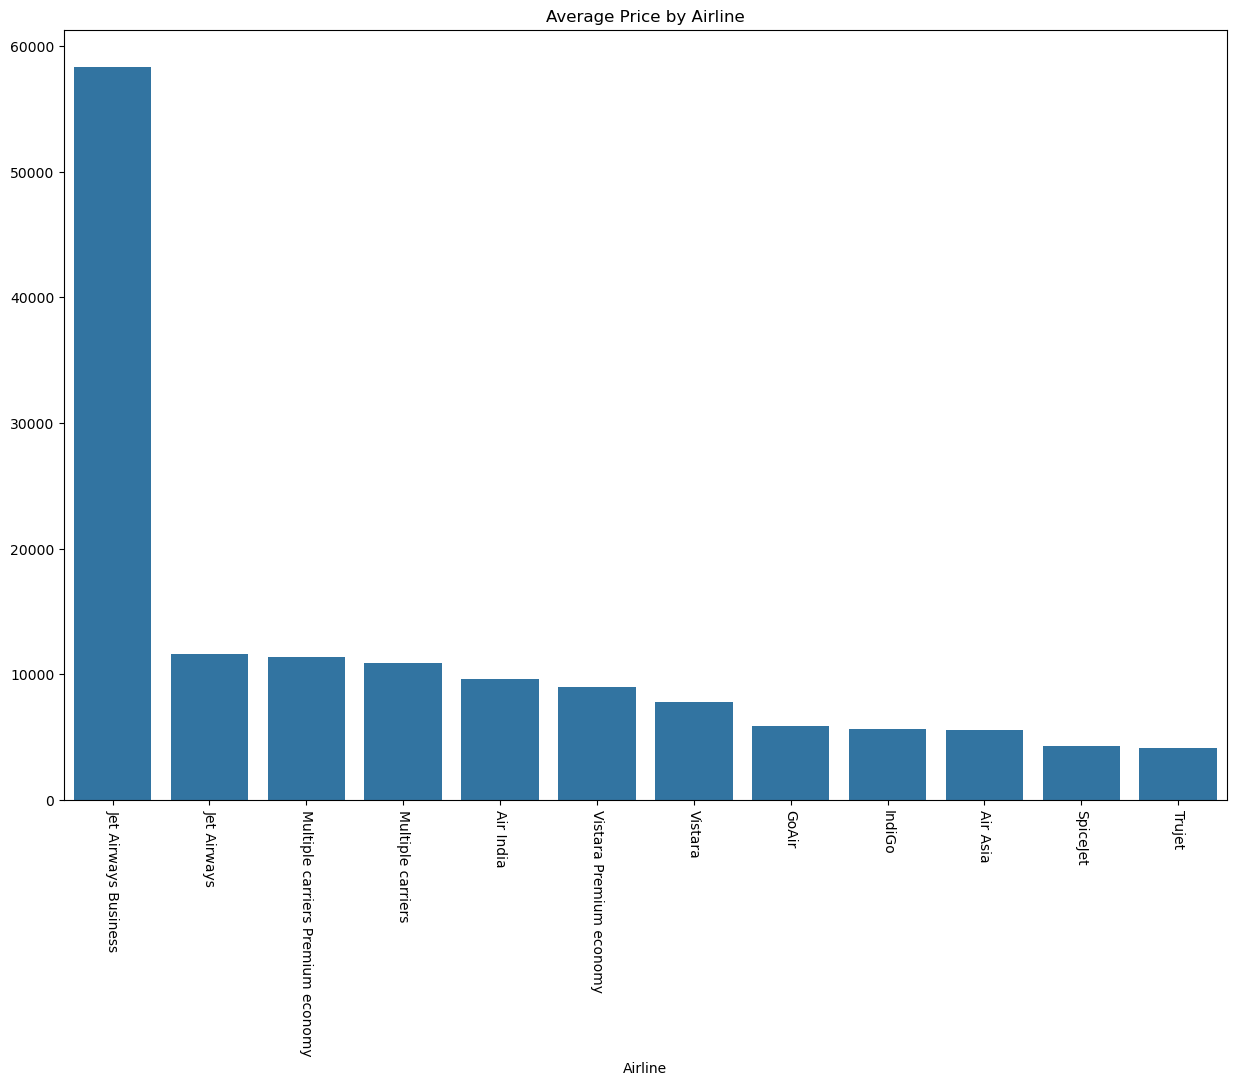

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Airline', calculate mean prices, and sort in descending order
Airprices = df1.groupby('Airline')['Price'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=Airprices.index, y=Airprices.values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=270)

# Add a title for clarity
plt.title('Average Price by Airline')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

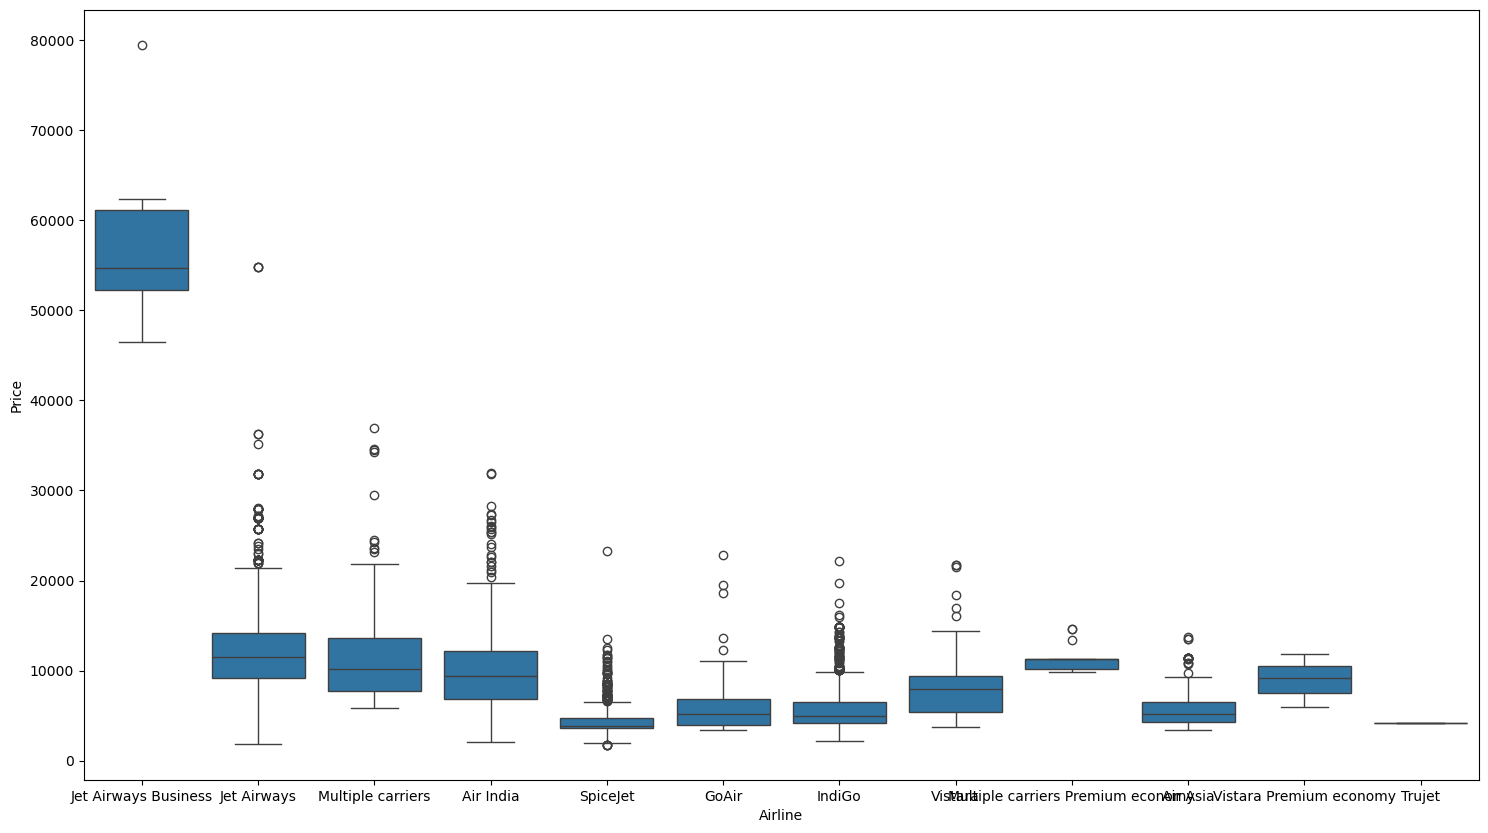

In [189]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df1.sort_values('Price',ascending=False))
plt.show

In [191]:
df1.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

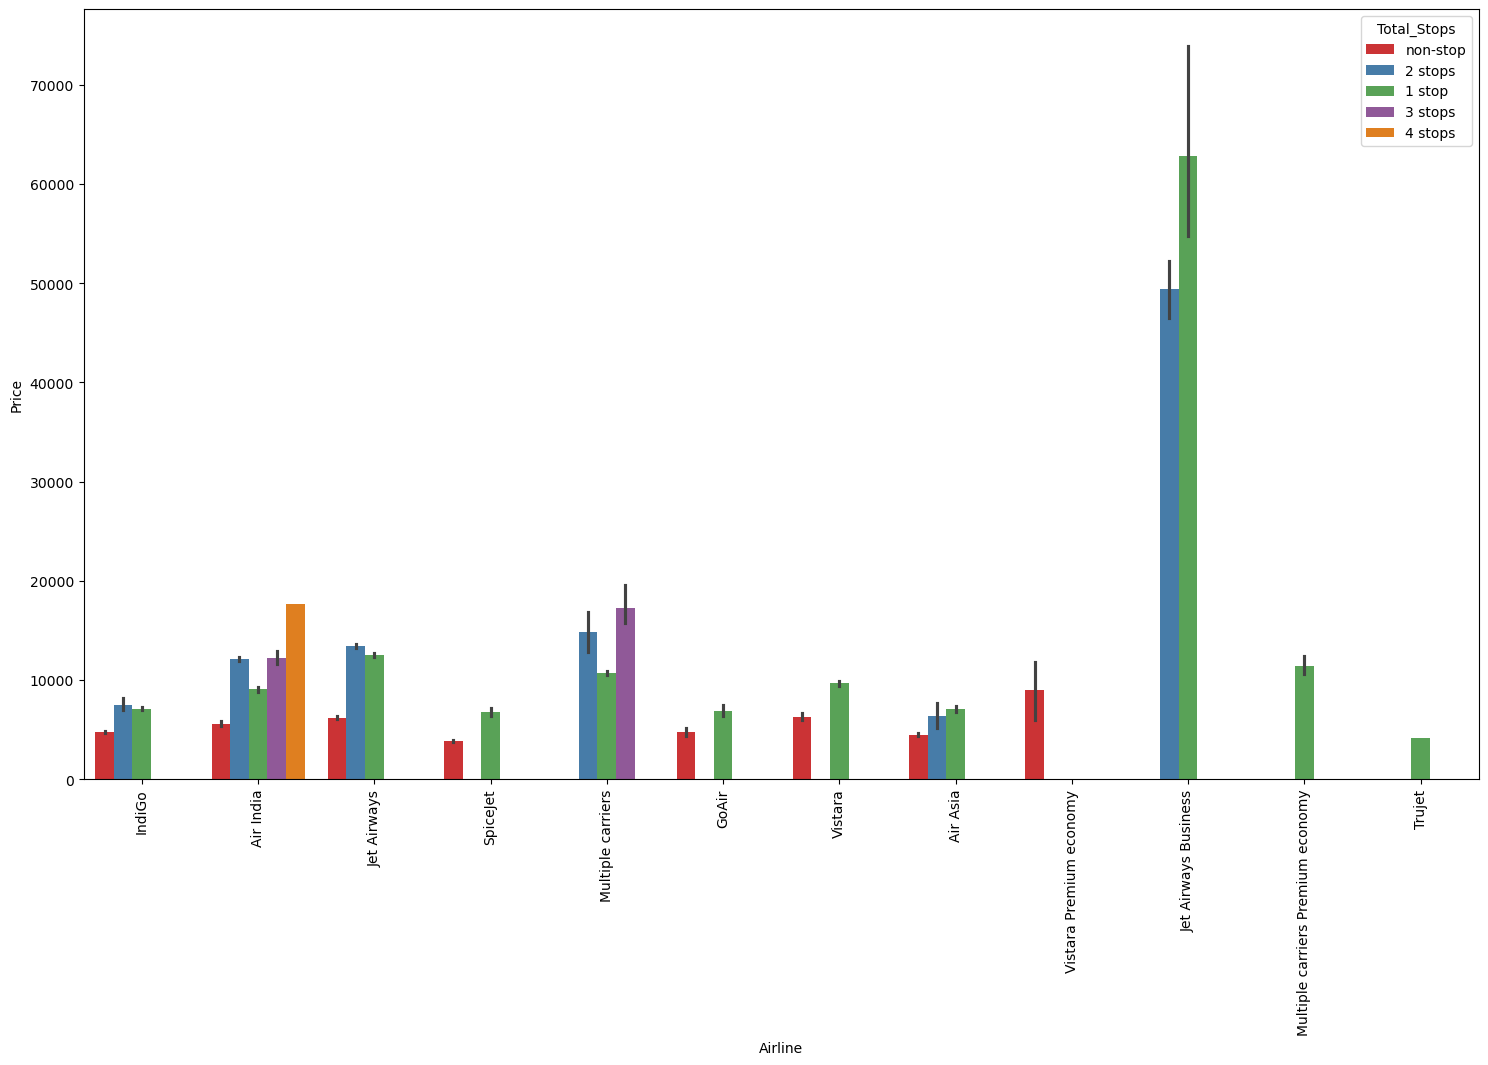

In [193]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df1['Airline'],y=df['Price'],hue=df1['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [195]:
df1['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

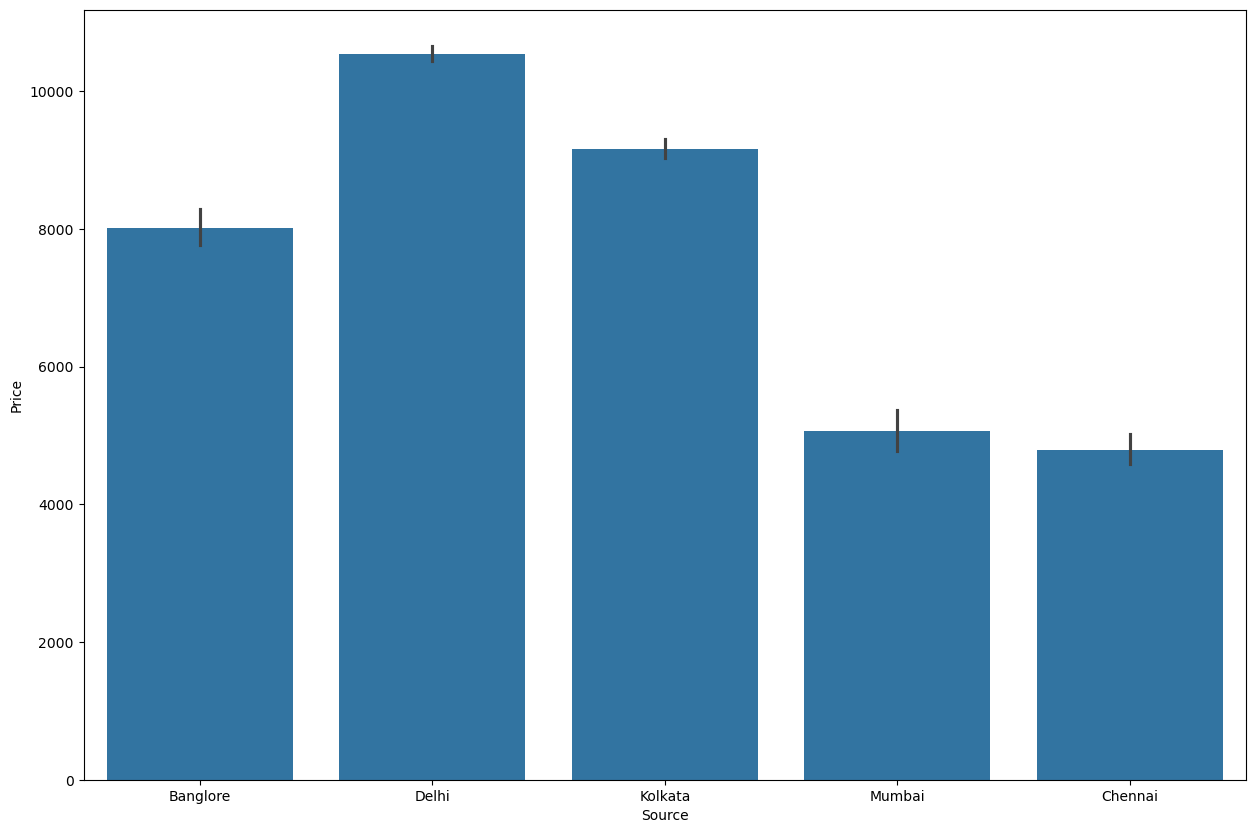

In [197]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df1.sort_values('Price',ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

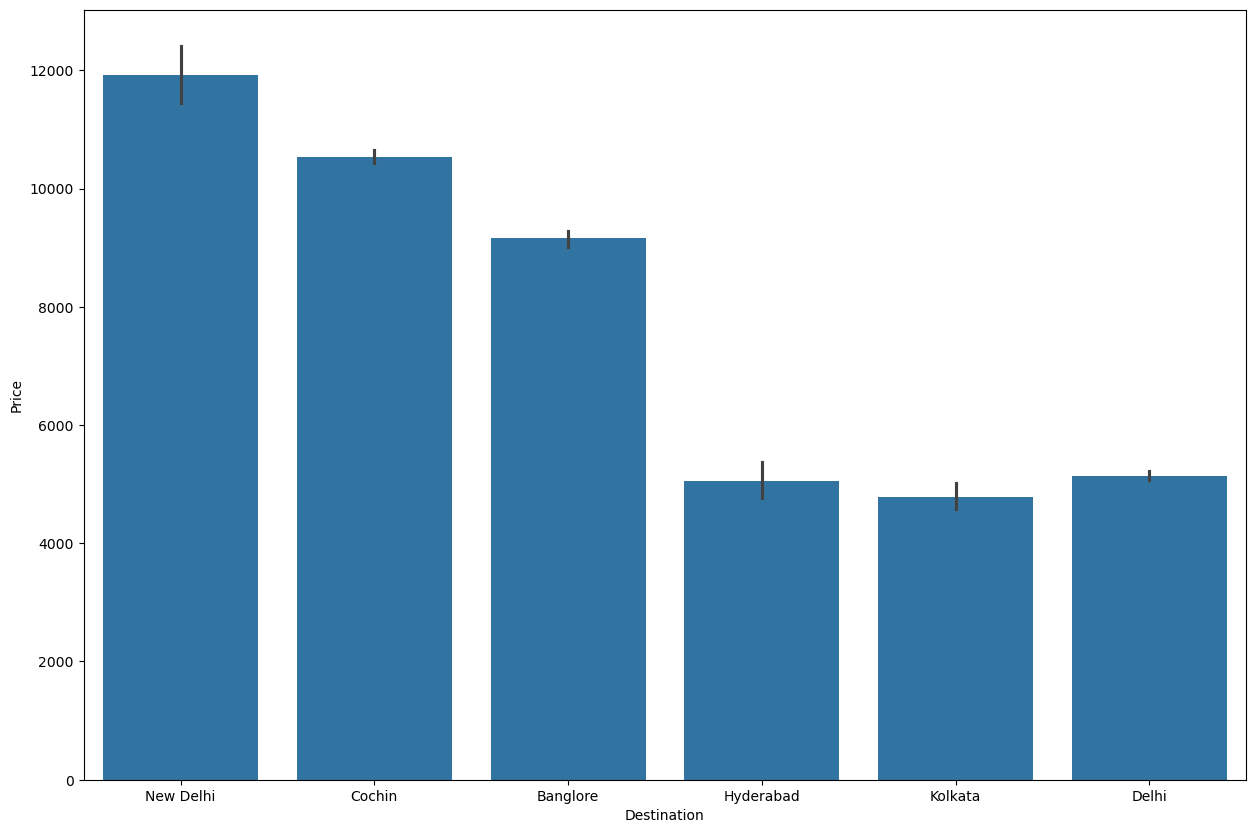

In [198]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [201]:
df1['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [203]:
for i in df1:
    df1.replace('New Delhi','Delhi',inplace=True)

In [205]:
df1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

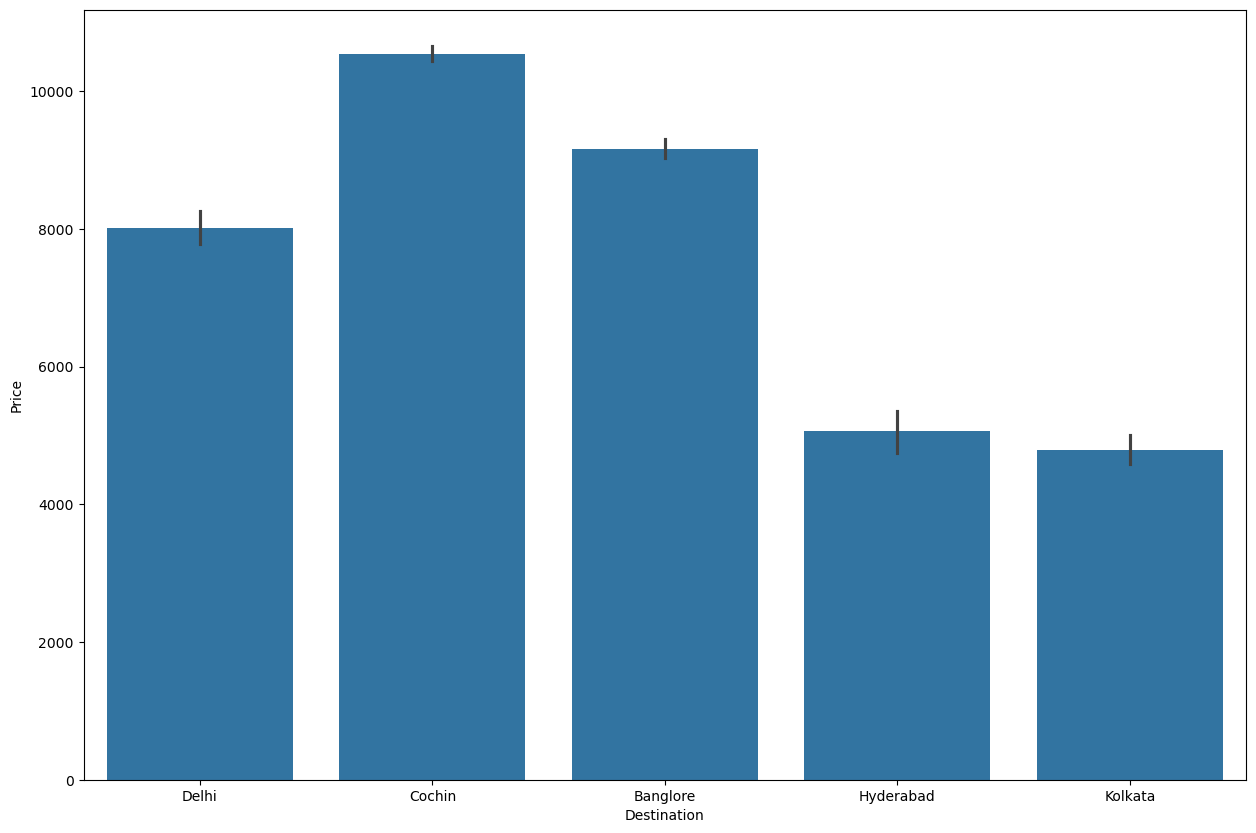

In [207]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df1.sort_values('Price',ascending=False))
plt.show

In [209]:
df1['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

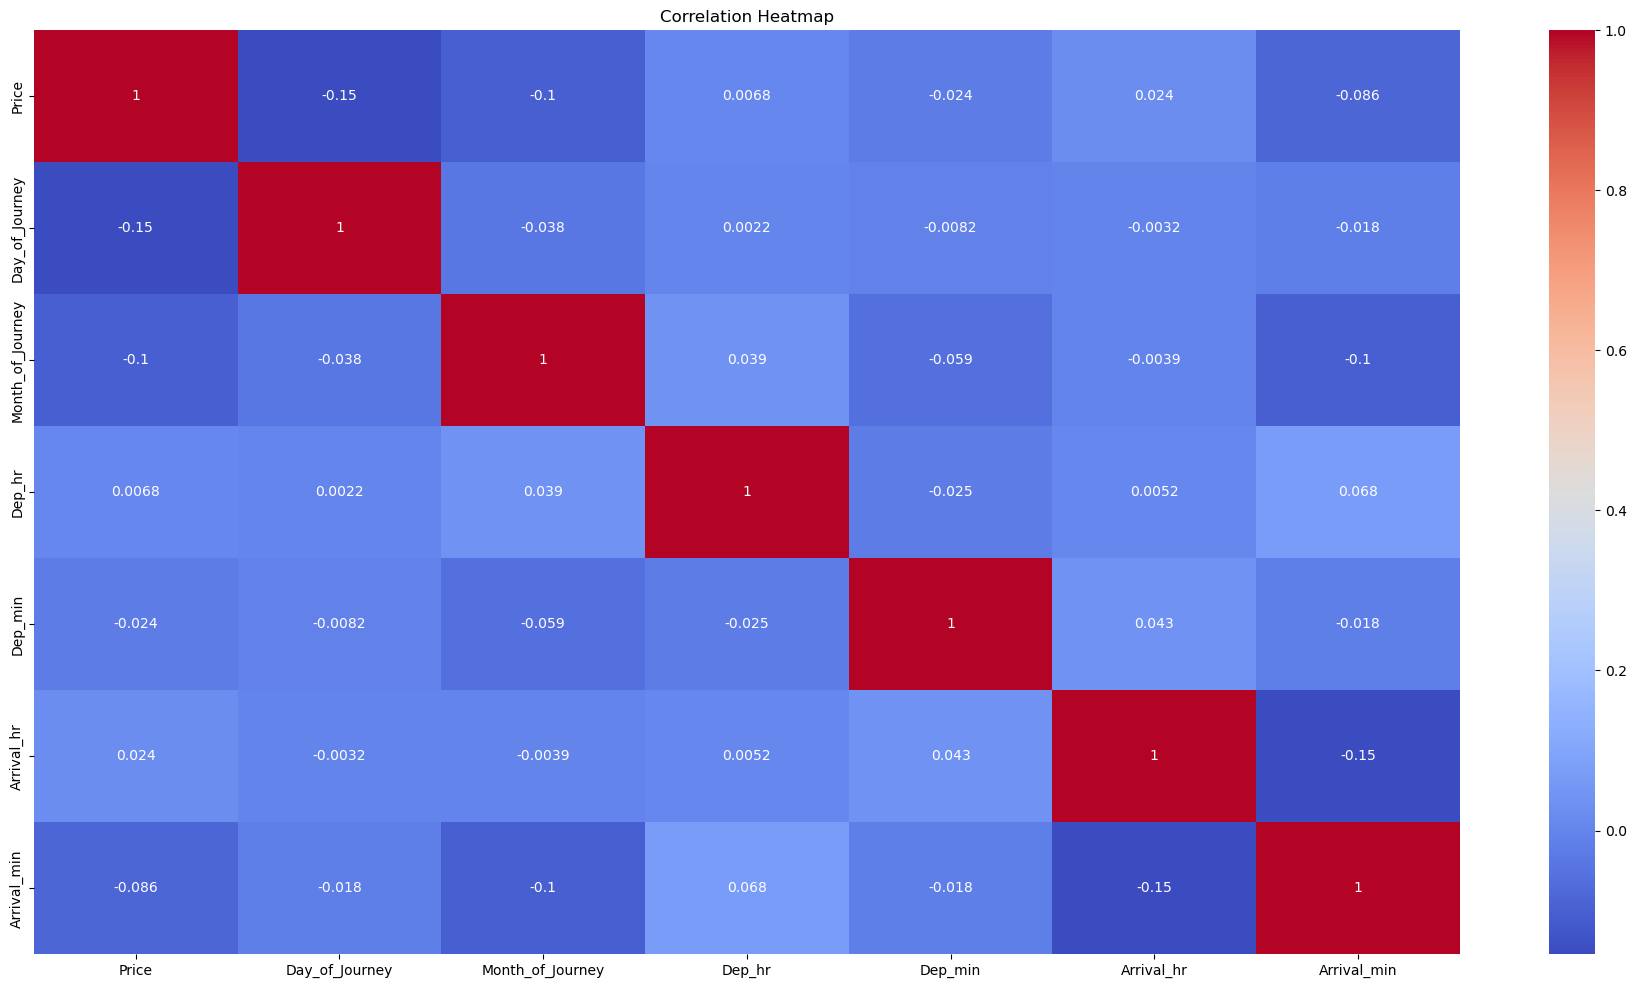

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(23, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')
plt.show()

In [213]:
#Handling Categorical Values 
df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df1['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df1[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df1],axis=1)

In [215]:
df1.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [217]:
df1.sample(5)

,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
8984,DEL → BOM → COK,1,No info,5073,27,3,16,0,21,0,5,00
1790,BOM → HYD,0,No info,2754,12,6,1,40,3,10,1,30
9123,CCU → BOM → BLR,1,No info,13584,6,5,21,10,8,15,11,5
7105,CCU → HYD → BLR,1,No info,6117,21,5,19,0,11,5,16,5
1467,DEL → BOM → COK,1,No info,14502,3,6,10,0,19,0,9,00


In [219]:
df1.shape

(10682, 12)

In [221]:
df_test = pd.read_excel("Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [223]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y')
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [225]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [227]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 34)
test_shape (2671, 28)


In [229]:
x=df1.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df1['Price']

In [231]:
x.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,24,3,22,20,1,10,2,50
1,2,1,5,5,50,13,15,7,25
2,2,9,6,9,25,4,25,19,00


In [233]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

<Axes: >

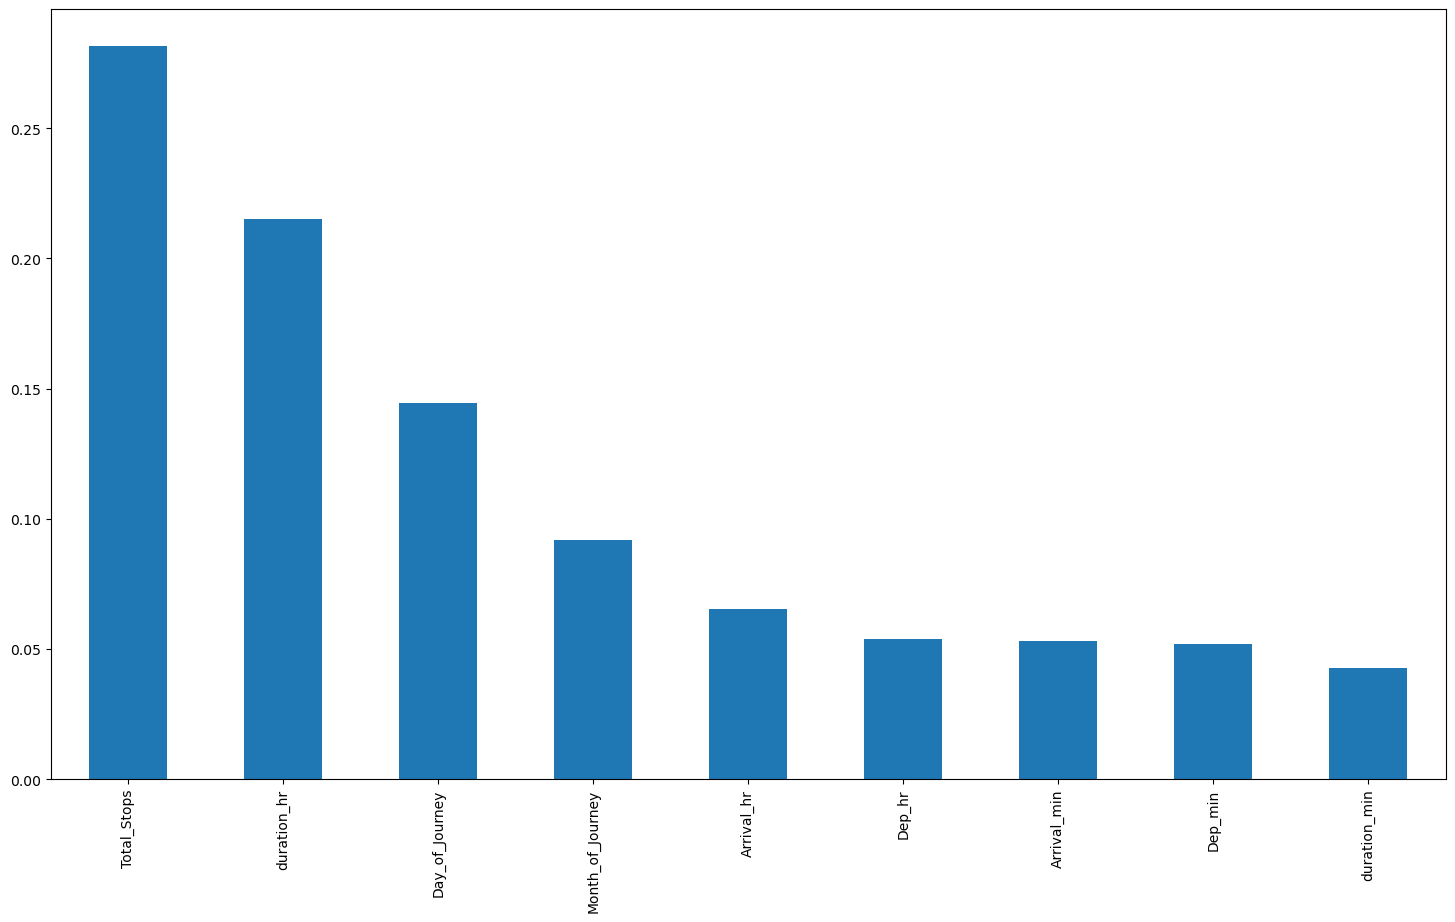

In [235]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [237]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [239]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7015496586988348

In [241]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7351417947872518

In [243]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [245]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [246]:
rf_pred=rCV.predict(X_test)
rf_pred

array([11349.87037789,  4599.26954125,  6077.17454918, ...,
       11175.37690727,  9643.02633181,  9718.39701913])

In [247]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1373.499047528894
MSE 4854495.025116161


In [251]:
r2_score(y_test,rf_pred)

0.7635837265737364

In [253]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.1/101.7 MB 363.1 kB/s eta 0:04:40
   ---------------------------------------- 0.1/101.7 MB 599.1 kB/s eta 0:02:50
   ---------------------------------------- 0.2/101.7 MB 827.9 kB/s eta 0:02:03
   ---------------------------------------- 0.3/101.7 MB 983.9 kB/s eta 0:01:44
   ---------------------------------------- 0.4/101.7 MB 1.2 MB/s eta 0:01:28
   ---------------------------------------- 0.7/101.7 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 1.0/101.7 MB 2.3 MB/s eta 0:00:44
    --------------------------------------- 1.5/101.7 MB 3.1 MB/s eta 0:00:33
    --------------------------------------- 1.8/101.7 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.8/101.7 MB 3.5 MB/s et

In [254]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4492.5740184	total: 163ms	remaining: 2m 42s
1:	learn: 4368.4386818	total: 176ms	remaining: 1m 27s
2:	learn: 4236.9563294	total: 182ms	remaining: 1m
3:	learn: 4117.8697342	total: 188ms	remaining: 46.7s
4:	learn: 4012.2264222	total: 193ms	remaining: 38.5s
5:	learn: 3908.5678423	total: 200ms	remaining: 33.1s
6:	learn: 3821.6558802	total: 207ms	remaining: 29.3s
7:	learn: 3734.5336202	total: 210ms	remaining: 26.1s
8:	learn: 3660.1980974	total: 214ms	remaining: 23.6s
9:	learn: 3586.1393640	total: 218ms	remaining: 21.5s
10:	learn: 3518.8009199	total: 221ms	remaining: 19.9s
11:	learn: 3454.4819449	total: 224ms	remaining: 18.5s
12:	learn: 3395.7451928	total: 227ms	remaining: 17.3s
13:	learn: 3346.0110734	total: 230ms	remaining: 16.2s
14:	learn: 3311.6938170	total: 233ms	remaining: 15.3s
15:	learn: 3266.5366836	total: 236ms	remaining: 14.5s
16:	learn: 3225.7397154	total: 239ms	remaining: 13.8s
17:	learn: 3185.7650738	total: 242ms	remaining: 13.2s
18:	learn

In [255]:
cat_pred=cat.predict(X_test)

In [256]:
r2_score(y_test,cat_pred)

0.7642024975195681

In [261]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.4 MB 445.2 kB/s eta 0:00:04
    --------------------------------------- 0.0/1.4 MB 445.2 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 299.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.4 MB 573.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 588.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 626.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 630.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 610.3 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 634.7 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 656.4 kB/s eta 0:0

In [263]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [265]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 9
[LightGBM] [Info] Start training from score 9056.953189


LGBMRegressor()

In [266]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.7683516395001551

In [269]:
!pip install xgboost

In [270]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.7640352487574815

In [273]:
# #Use pickle to save our model so that we can use it later
import pickle 
# # Saving model to disk
pickle.dump(lgb_model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [281]:
df1.columns

Index(['Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [283]:
deploy_df=df1.drop(['Route','Additional_Info'],axis=1)

In [285]:
deploy_df.to_csv('deploy_df')

In [289]:
deploy_df.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,00
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
